# Case Study - World Happiness Analysis Project

## Table of Contents

1. Importing Libraries
2. Import Data - 2019 Data
3. Data Consistency Check - 2019 Data
4. Data Preparation for Regression Analysis
* a. happiness_score_2019 vs economy_gdp_2019
* b. happiness_score_2019 vs social_support_2019
* c. happiness_score_2019 vs health_life_expectancy_2019
* d. happiness_score_2019 vs freedom_2019
* e. happiness_score_2019 vs trust_2019
* f. happiness_score_2019 vs generosity_2019
5. Regression Analysis
* a. happiness_score_2019 vs economy_gdp_2019
* b. happiness_score_2019 vs social_support_2019
* c. happiness_score_2019 vs health_life_expectancy_2019
* d. happiness_score_2019 vs freedom_2019
* e. happiness_score_2019 vs trust_2019
* f. happiness_score_2019 vs generosity_2019

# 01. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures the charts created  are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

# 02a. Importing Data

In [3]:
# Path & list setup
path = r'/Users/ChuahLH/Desktop/Data Science/Data Immersion/Achievement 6/World Happiness Analysis'

In [4]:
# Import 2015.csv dataset into notebook using the os library and the vars_list
df_2019 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', '2019_clean_data.csv'), index_col = False)

In [5]:
df_2019.head()

,Unnamed: 0,happiness_rank_2019,country,happiness_score_2019,economy_gdp_2019,social_support_2019,healthy_life_expectancy_2019,freedom_2019,generosity_2019,trust_2019
0,0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [6]:
# Drop the redundant columns
df_2019 = df_2019.drop(['Unnamed: 0'],axis = 1)

In [7]:
df_2019.shape

(156, 9)

In [8]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   happiness_rank_2019           156 non-null    int64  
 1   country                       156 non-null    object 
 2   happiness_score_2019          156 non-null    float64
 3   economy_gdp_2019              156 non-null    float64
 4   social_support_2019           156 non-null    float64
 5   healthy_life_expectancy_2019  156 non-null    float64
 6   freedom_2019                  156 non-null    float64
 7   generosity_2019               156 non-null    float64
 8   trust_2019                    156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


# 03a. Data Consistency Check - 2019 Data

In [9]:
# check for missing values
df_2019.isnull().sum()

happiness_rank_2019             0
country                         0
happiness_score_2019            0
economy_gdp_2019                0
social_support_2019             0
healthy_life_expectancy_2019    0
freedom_2019                    0
generosity_2019                 0
trust_2019                      0
dtype: int64

In [11]:
# To view missing values
df_nan_2019 = df_2019[df_2019['trust_2019'].isnull()== True]

In [12]:
df_nan_2019

,happiness_rank_2019,country,happiness_score_2019,economy_gdp_2019,social_support_2019,healthy_life_expectancy_2019,freedom_2019,generosity_2019,trust_2019


There is one missing value under trust_2018. Can be neglected. 

In [14]:
# Finding Duplicates
df_dups_2019 = df_2019[df_2019.duplicated()]

In [15]:
df_dups_2019

,happiness_rank_2019,country,happiness_score_2019,economy_gdp_2019,social_support_2019,healthy_life_expectancy_2019,freedom_2019,generosity_2019,trust_2019


Confirmed no duplicated values.

In [16]:
df_2019.describe()

,happiness_rank_2019,happiness_score_2019,economy_gdp_2019,social_support_2019,healthy_life_expectancy_2019,freedom_2019,generosity_2019,trust_2019
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


# 04a. Data Preparation for Regression Analysis - 2019 Data

### happiness_score_2019 vs economy_gdp_2019

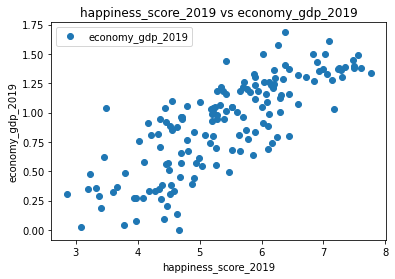

In [17]:
# Create a scatterplot using matplotlib to have another look on how the chosen variables plot against each other

df_2019.plot(x = 'happiness_score_2019', y='economy_gdp_2019',style='o')
plt.title('happiness_score_2019 vs economy_gdp_2019')  
plt.xlabel('happiness_score_2019')  
plt.ylabel('economy_gdp_2019')  
plt.show()

In [18]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df_2019['happiness_score_2019'].values.reshape(-1,1)
y = df_2019['economy_gdp_2019'].values.reshape(-1,1)

In [19]:
X

array([[7.769],
       [7.6  ],
       [7.554],
       [7.494],
       [7.488],
       [7.48 ],
       [7.343],
       [7.307],
       [7.278],
       [7.246],
       [7.228],
       [7.167],
       [7.139],
       [7.09 ],
       [7.054],
       [7.021],
       [6.985],
       [6.923],
       [6.892],
       [6.852],
       [6.825],
       [6.726],
       [6.595],
       [6.592],
       [6.446],
       [6.444],
       [6.436],
       [6.375],
       [6.374],
       [6.354],
       [6.321],
       [6.3  ],
       [6.293],
       [6.262],
       [6.253],
       [6.223],
       [6.199],
       [6.198],
       [6.192],
       [6.182],
       [6.174],
       [6.149],
       [6.125],
       [6.118],
       [6.105],
       [6.1  ],
       [6.086],
       [6.07 ],
       [6.046],
       [6.028],
       [6.021],
       [6.008],
       [5.94 ],
       [5.895],
       [5.893],
       [5.89 ],
       [5.888],
       [5.886],
       [5.86 ],
       [5.809],
       [5.779],
       [5.758],
       [

In [20]:
y

array([[1.34 ],
       [1.383],
       [1.488],
       [1.38 ],
       [1.396],
       [1.452],
       [1.387],
       [1.303],
       [1.365],
       [1.376],
       [1.372],
       [1.034],
       [1.276],
       [1.609],
       [1.333],
       [1.499],
       [1.373],
       [1.356],
       [1.433],
       [1.269],
       [1.503],
       [1.3  ],
       [1.07 ],
       [1.324],
       [1.368],
       [1.159],
       [0.8  ],
       [1.403],
       [1.684],
       [1.286],
       [1.149],
       [1.004],
       [1.124],
       [1.572],
       [0.794],
       [1.294],
       [1.362],
       [1.246],
       [1.231],
       [1.206],
       [0.745],
       [1.238],
       [0.985],
       [1.258],
       [0.694],
       [0.882],
       [1.092],
       [1.162],
       [1.263],
       [0.912],
       [1.5  ],
       [1.05 ],
       [1.187],
       [1.301],
       [1.237],
       [0.831],
       [1.12 ],
       [1.327],
       [0.642],
       [1.173],
       [0.776],
       [1.201],
       [

In [21]:
# Split data into a training set and a test set.  Using test_train_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

# 05a. Regression Analysis - 2019 Data

### happiness_score_2019 vs economy_gdp_2019

In [22]:
# create a regression object

regression = LinearRegression()

In [23]:
# fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [24]:
# predict the values of y using X

y_predicted = regression.predict(X_test)

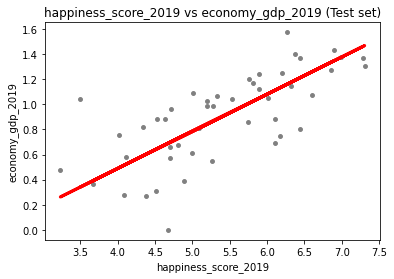

In [25]:
# create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('happiness_score_2019 vs economy_gdp_2019 (Test set)')
plot_test.xlabel('happiness_score_2019')
plot_test.ylabel('economy_gdp_2019')
plot_test.show()

In [26]:
# create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [27]:
# print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.29543786]]
Mean squared error:  0.06525768760105287
R2 score:  0.4853081851236668


The plot (test model) shows a positive relationship, so the coefficient is positive (0.295). The slope means that as happiness_score_2019 rises, as well as the economy_gdp_2019 rises too. In this case, the MSE shows 0.065, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of econogmy_gdp_2019 to happiness_score_2019. The R2 is 48.5 percent, which the data isn't fit that great. 

In [28]:
y_predicted

array([[1.20936092],
       [1.04893816],
       [1.13904671],
       [0.67845908],
       [1.2123153 ],
       [1.4666873 ],
       [1.1100938 ],
       [0.69854886],
       [0.52128614],
       [1.1319562 ],
       [0.84331341],
       [1.08291352],
       [0.69648079],
       [0.64212022],
       [1.04746097],
       [0.3384101 ],
       [1.15795474],
       [0.64300654],
       [1.11157099],
       [0.60016805],
       [0.39011173],
       [1.45811961],
       [0.49410585],
       [1.02412138],
       [0.68702678],
       [0.26248257],
       [0.86222143],
       [1.00462248],
       [0.86606212],
       [0.80933806],
       [1.37155631],
       [1.33226308],
       [0.58775966],
       [0.7839304 ],
       [1.25633554],
       [0.88053858],
       [0.75054592],
       [0.72956983],
       [0.84154078],
       [1.19133921],
       [0.69529904],
       [0.5147865 ],
       [0.78836197],
       [1.34408059],
       [1.00905405],
       [1.17538557],
       [0.94021703]])

In [29]:
# create a dataframe comparing the actual and predicted values of Y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.800,1.209361
1,1.237,1.048938
2,1.246,1.139047
3,0.879,0.678459
4,1.368,1.212315
5,1.303,1.466687
6,0.882,1.110094
7,0.960,0.698549
8,0.578,0.521286
9,0.745,1.131956


In [30]:
# predict

y_predicted_train = regression.predict(X_train) 

In [31]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [32]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.29543786]]
Mean squared error:  0.05553712452438505
R2 score:  0.6752547237794555


The plot (train model) shows a positive relationship, so the coefficient is positive (0.295). The slope means that as happiness_score_2019 rises, as well as the economy_gdp_2019 rises too. In this case, the MSE shows 0.056, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of econogmy_gdp_2019 to happiness_score_2019. The R2 is 67.5 percent, which the data isn't fit that great.

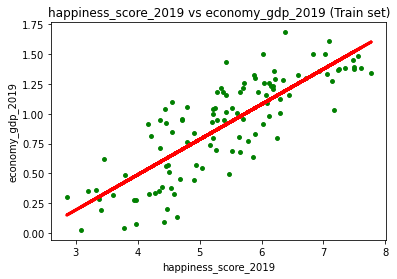

In [33]:
# visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('happiness_score_2019 vs economy_gdp_2019 (Train set)')
plot_test.xlabel('happiness_score_2019')
plot_test.ylabel('economy_gdp_2019')
plot_test.show()

The models outcome on the training set is very similar to that on the test set. With the MSE being even larger on the train set. The R2 is higher in train set compared to test set. 

# 04b. Data Preparation for Regression Analysis - 2019 Data

### happiness_score_2019 vs social_support_2019

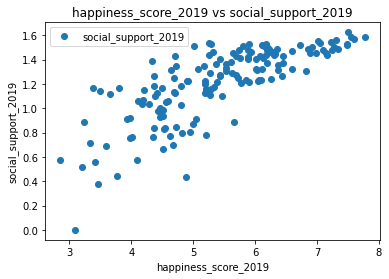

In [34]:
# Create a scatterplot using matplotlib to have another look on how the chosen variables plot against each other

df_2019.plot(x = 'happiness_score_2019', y='social_support_2019',style='o')
plt.title('happiness_score_2019 vs social_support_2019')  
plt.xlabel('happiness_score_2019')  
plt.ylabel('social_support_2019')  
plt.show()

In [35]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df_2019['happiness_score_2019'].values.reshape(-1,1)
y = df_2019['social_support_2019'].values.reshape(-1,1)

In [36]:
X

array([[7.769],
       [7.6  ],
       [7.554],
       [7.494],
       [7.488],
       [7.48 ],
       [7.343],
       [7.307],
       [7.278],
       [7.246],
       [7.228],
       [7.167],
       [7.139],
       [7.09 ],
       [7.054],
       [7.021],
       [6.985],
       [6.923],
       [6.892],
       [6.852],
       [6.825],
       [6.726],
       [6.595],
       [6.592],
       [6.446],
       [6.444],
       [6.436],
       [6.375],
       [6.374],
       [6.354],
       [6.321],
       [6.3  ],
       [6.293],
       [6.262],
       [6.253],
       [6.223],
       [6.199],
       [6.198],
       [6.192],
       [6.182],
       [6.174],
       [6.149],
       [6.125],
       [6.118],
       [6.105],
       [6.1  ],
       [6.086],
       [6.07 ],
       [6.046],
       [6.028],
       [6.021],
       [6.008],
       [5.94 ],
       [5.895],
       [5.893],
       [5.89 ],
       [5.888],
       [5.886],
       [5.86 ],
       [5.809],
       [5.779],
       [5.758],
       [

In [37]:
y

array([[1.587],
       [1.573],
       [1.582],
       [1.624],
       [1.522],
       [1.526],
       [1.487],
       [1.557],
       [1.505],
       [1.475],
       [1.548],
       [1.441],
       [1.455],
       [1.479],
       [1.538],
       [1.553],
       [1.454],
       [1.504],
       [1.457],
       [1.487],
       [1.31 ],
       [1.52 ],
       [1.323],
       [1.472],
       [1.43 ],
       [1.369],
       [1.269],
       [1.357],
       [1.313],
       [1.484],
       [1.442],
       [1.439],
       [1.465],
       [1.463],
       [1.242],
       [1.488],
       [1.368],
       [1.504],
       [1.477],
       [1.438],
       [1.529],
       [1.515],
       [1.41 ],
       [1.523],
       [1.325],
       [1.232],
       [1.432],
       [1.232],
       [1.223],
       [1.312],
       [1.319],
       [1.409],
       [1.465],
       [1.219],
       [1.528],
       [1.478],
       [1.402],
       [1.419],
       [1.236],
       [1.508],
       [1.209],
       [1.41 ],
       [

In [38]:
# Split data into a training set and a test set.  Using test_train_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

# 05b. Regression Analysis - 2018 Data

### happiness_score_2018 vs social_support_2018

In [39]:
# create a regression object

regression = LinearRegression()

In [40]:
# fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [41]:
# predict the values of y using X

y_predicted = regression.predict(X_test)

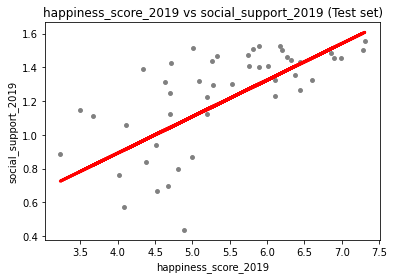

In [42]:
# create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('happiness_score_2019 vs social_support_2019 (Test set)')
plot_test.xlabel('happiness_score_2019')
plot_test.ylabel('social_support_2019')
plot_test.show()

In [43]:
# create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [44]:
# print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.21628982]]
Mean squared error:  0.0499421415278313
R2 score:  0.3981729596767559


The plot (test model) shows a positive relationship, so the coefficient is positive (0.216). The slope means that as happiness_score_2019 rises, as well as the social_support_2019 rises too. In this case, the MSE shows 0.05, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of social_support_2019 to happiness_score_2019. The R2 is 39.8 percent, which the data isn't fit that great.

In [45]:
y_predicted

array([[1.41933556],
       [1.30189019],
       [1.36785858],
       [1.03066275],
       [1.42149846],
       [1.607724  ],
       [1.34666218],
       [1.04537045],
       [0.91559656],
       [1.36266763],
       [1.15135247],
       [1.32676352],
       [1.04385643],
       [1.0040591 ],
       [1.30080874],
       [0.78171316],
       [1.38170113],
       [1.00470797],
       [1.34774363],
       [0.97334594],
       [0.81956388],
       [1.60145159],
       [0.8956979 ],
       [1.28372184],
       [1.03693515],
       [0.72612668],
       [1.16519502],
       [1.26944671],
       [1.16800678],
       [1.12647914],
       [1.53807867],
       [1.50931213],
       [0.96426177],
       [1.10787821],
       [1.45372564],
       [1.17860499],
       [1.08343746],
       [1.06808089],
       [1.15005473],
       [1.40614188],
       [1.04299127],
       [0.91083818],
       [1.11112256],
       [1.51796372],
       [1.27269106],
       [1.39446223],
       [1.22229553]])

In [46]:
# create a dataframe comparing the actual and predicted values of Y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1.269,1.419336
1,1.528,1.301890
2,1.504,1.367859
3,1.313,1.030663
4,1.430,1.421498
5,1.557,1.607724
6,1.232,1.346662
7,1.427,1.045370
8,1.058,0.915597
9,1.529,1.362668


In [47]:
# predict

y_predicted_train = regression.predict(X_train) 

In [48]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [49]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.21628982]]
Mean squared error:  0.029200254588268117
R2 score:  0.6794498396016616


The plot (train model) shows a positive relationship, so the coefficient is positive (0.216). The slope means that as happiness_score_2019 rises, as well as the social_support_2019 rises too. In this case, the MSE shows 0.0292, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of social_support_2019 to happiness_score_2019. The R2 is 67.9 percent, which the data isn't fit that great.

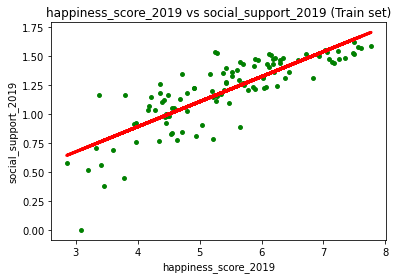

In [50]:
# visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('happiness_score_2019 vs social_support_2019 (Train set)')
plot_test.xlabel('happiness_score_2019')
plot_test.ylabel('social_support_2019')
plot_test.show()

The models outcome on the training set is very similar to that on the test set. With the MSE larger on the test set; The R2 is higher in train set compared to test set. 

# 04c. Data Preparation for Regression Analysis - 2019 Data

### happiness_score_2019 vs health_life_expectancy_2019

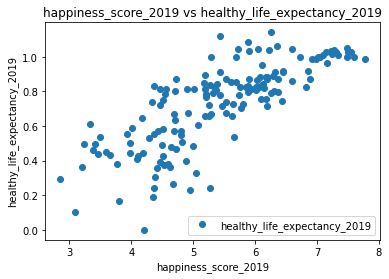

In [51]:
# Create a scatterplot using matplotlib to have another look on how the chosen variables plot against each other

df_2019.plot(x ='happiness_score_2019', y='healthy_life_expectancy_2019',style='o')
plt.title('happiness_score_2019 vs healthy_life_expectancy_2019')  
plt.xlabel('happiness_score_2019')  
plt.ylabel('healthy_life_expectancy_2019')  
plt.show()

In [52]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df_2019['happiness_score_2019'].values.reshape(-1,1)
y = df_2019['healthy_life_expectancy_2019'].values.reshape(-1,1)

In [53]:
X

array([[7.769],
       [7.6  ],
       [7.554],
       [7.494],
       [7.488],
       [7.48 ],
       [7.343],
       [7.307],
       [7.278],
       [7.246],
       [7.228],
       [7.167],
       [7.139],
       [7.09 ],
       [7.054],
       [7.021],
       [6.985],
       [6.923],
       [6.892],
       [6.852],
       [6.825],
       [6.726],
       [6.595],
       [6.592],
       [6.446],
       [6.444],
       [6.436],
       [6.375],
       [6.374],
       [6.354],
       [6.321],
       [6.3  ],
       [6.293],
       [6.262],
       [6.253],
       [6.223],
       [6.199],
       [6.198],
       [6.192],
       [6.182],
       [6.174],
       [6.149],
       [6.125],
       [6.118],
       [6.105],
       [6.1  ],
       [6.086],
       [6.07 ],
       [6.046],
       [6.028],
       [6.021],
       [6.008],
       [5.94 ],
       [5.895],
       [5.893],
       [5.89 ],
       [5.888],
       [5.886],
       [5.86 ],
       [5.809],
       [5.779],
       [5.758],
       [

In [54]:
y

array([[0.986],
       [0.996],
       [1.028],
       [1.026],
       [0.999],
       [1.052],
       [1.009],
       [1.026],
       [1.039],
       [1.016],
       [1.036],
       [0.963],
       [1.029],
       [1.012],
       [0.996],
       [0.999],
       [0.987],
       [0.986],
       [0.874],
       [0.92 ],
       [0.825],
       [0.999],
       [0.861],
       [1.045],
       [0.914],
       [0.92 ],
       [0.746],
       [0.795],
       [0.871],
       [1.062],
       [0.91 ],
       [0.802],
       [0.891],
       [1.141],
       [0.789],
       [1.039],
       [0.871],
       [0.881],
       [0.713],
       [0.884],
       [0.756],
       [0.818],
       [0.841],
       [0.953],
       [0.835],
       [0.758],
       [0.881],
       [0.825],
       [1.042],
       [0.868],
       [0.808],
       [0.828],
       [0.812],
       [1.036],
       [0.874],
       [0.831],
       [0.798],
       [1.088],
       [0.828],
       [0.729],
       [0.706],
       [0.828],
       [

In [55]:
# Split data into a training set and a test set.  Using test_train_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

# 05c. Regression Analysis - 2019 Data

### happiness_score_2019 vs health_life_expectancy_2019

In [56]:
# create a regression object

regression = LinearRegression()

In [57]:
# fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [58]:
# predict the values of y using X

y_predicted = regression.predict(X_test)

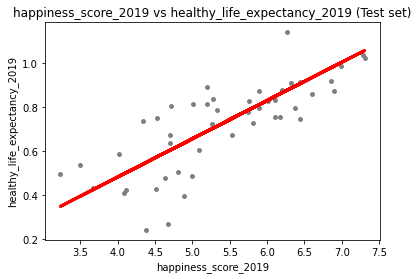

In [59]:
# create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('happiness_score_2019 vs healthy_life_expectancy_2019 (Test set)')
plot_test.xlabel('happiness_score_2019')
plot_test.ylabel('healthy_life_expectancy_2019')
plot_test.show()

In [60]:
# create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [61]:
# print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.17394167]]
Mean squared error:  0.01694020085033727
R2 score:  0.5919533966813655


The plot (test model) shows a positive relationship, so the coefficient is positive (0.174). The slope means that as happiness_score_2019 rises, as well as the health_life_expectancy_2019 rises too. In this case, the MSE shows 0.017, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of health_life_expectancy_2019 to happiness_score_2019. The R2 is 59.2 percent, which the data isn't fit that great.

In [62]:
y_predicted

array([[0.90680477],
       [0.81235445],
       [0.86540666],
       [0.59423159],
       [0.90854419],
       [1.05830797],
       [0.84836037],
       [0.60605963],
       [0.50169462],
       [0.86123206],
       [0.69129104],
       [0.83235774],
       [0.60484203],
       [0.57283677],
       [0.81148474],
       [0.39402473],
       [0.87653892],
       [0.57335859],
       [0.84923008],
       [0.54813705],
       [0.42446452],
       [1.05326366],
       [0.48569199],
       [0.79774335],
       [0.5992759 ],
       [0.34932172],
       [0.70242331],
       [0.7862632 ],
       [0.70468455],
       [0.67128775],
       [1.00229875],
       [0.97916451],
       [0.5408315 ],
       [0.65632877],
       [0.9344615 ],
       [0.7132077 ],
       [0.63667336],
       [0.6243235 ],
       [0.69024739],
       [0.89619433],
       [0.60414627],
       [0.49786791],
       [0.65893789],
       [0.98612218],
       [0.78887232],
       [0.88680148],
       [0.74834391]])

In [63]:
# create a dataframe comparing the actual and predicted values of Y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.746,0.906805
1,0.874,0.812354
2,0.881,0.865407
3,0.477,0.594232
4,0.914,0.908544
5,1.026,1.058308
6,0.758,0.848360
7,0.805,0.606060
8,0.426,0.501695
9,0.756,0.861232


In [64]:
# predict

y_predicted_train = regression.predict(X_train) 

In [65]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [66]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.17394167]]
Mean squared error:  0.02539845744106735
R2 score:  0.6118119532166602


The plot (train model) shows a positive relationship, so the coefficient is positive (0.174). The slope means that as happiness_score_2019 rises, as well as the health_life_expectancy_2019 rises too. In this case, the MSE shows 0.025, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of health_life_expectancy_2019 to happiness_score_2019. The R2 is 61.2 percent, which the data isn't fit that great.

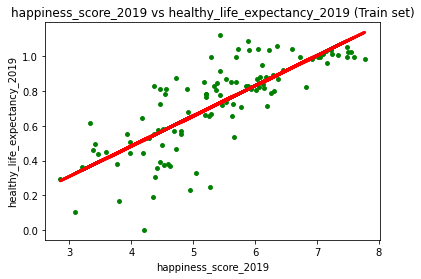

In [67]:
# visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('happiness_score_2019 vs healthy_life_expectancy_2019 (Train set)')
plot_test.xlabel('happiness_score_2019')
plot_test.ylabel('healthy_life_expectancy_2019')
plot_test.show()

The models outcome on the training set is very similar to that on the test set. With the MSE larger on the test set; The R2 is higher in train set compared to test set.

# 04d. Data Preparation for Regression Analysis - 2019 Data

### happiness_score_2019 vs freedom_2019

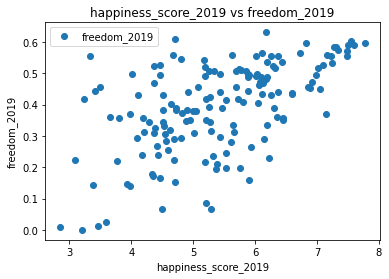

In [68]:
# Create a scatterplot using matplotlib to have another look on how the chosen variables plot against each other

df_2019.plot(x = 'happiness_score_2019', y='freedom_2019',style='o')
plt.title('happiness_score_2019 vs freedom_2019')  
plt.xlabel('happiness_score_2019')  
plt.ylabel('freedom_2019')  
plt.show()

In [69]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df_2019['happiness_score_2019'].values.reshape(-1,1)
y = df_2019['freedom_2019'].values.reshape(-1,1)

In [70]:
X

array([[7.769],
       [7.6  ],
       [7.554],
       [7.494],
       [7.488],
       [7.48 ],
       [7.343],
       [7.307],
       [7.278],
       [7.246],
       [7.228],
       [7.167],
       [7.139],
       [7.09 ],
       [7.054],
       [7.021],
       [6.985],
       [6.923],
       [6.892],
       [6.852],
       [6.825],
       [6.726],
       [6.595],
       [6.592],
       [6.446],
       [6.444],
       [6.436],
       [6.375],
       [6.374],
       [6.354],
       [6.321],
       [6.3  ],
       [6.293],
       [6.262],
       [6.253],
       [6.223],
       [6.199],
       [6.198],
       [6.192],
       [6.182],
       [6.174],
       [6.149],
       [6.125],
       [6.118],
       [6.105],
       [6.1  ],
       [6.086],
       [6.07 ],
       [6.046],
       [6.028],
       [6.021],
       [6.008],
       [5.94 ],
       [5.895],
       [5.893],
       [5.89 ],
       [5.888],
       [5.886],
       [5.86 ],
       [5.809],
       [5.779],
       [5.758],
       [

In [71]:
y

array([[0.596],
       [0.592],
       [0.603],
       [0.591],
       [0.557],
       [0.572],
       [0.574],
       [0.585],
       [0.584],
       [0.532],
       [0.557],
       [0.558],
       [0.371],
       [0.526],
       [0.45 ],
       [0.516],
       [0.495],
       [0.473],
       [0.454],
       [0.457],
       [0.598],
       [0.564],
       [0.433],
       [0.436],
       [0.351],
       [0.357],
       [0.535],
       [0.439],
       [0.555],
       [0.362],
       [0.516],
       [0.39 ],
       [0.523],
       [0.556],
       [0.43 ],
       [0.231],
       [0.536],
       [0.334],
       [0.489],
       [0.483],
       [0.631],
       [0.291],
       [0.47 ],
       [0.564],
       [0.435],
       [0.489],
       [0.471],
       [0.462],
       [0.406],
       [0.498],
       [0.493],
       [0.557],
       [0.264],
       [0.159],
       [0.495],
       [0.49 ],
       [0.498],
       [0.445],
       [0.507],
       [0.41 ],
       [0.511],
       [0.199],
       [

In [72]:
# Split data into a training set and a test set.  Using test_train_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

# 05d. Regression Analysis - 2019 Data

### happiness_score_2019 vs freedom_2019

In [73]:
# create a regression object

regression = LinearRegression()

In [74]:
# fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [75]:
# predict the values of y using X

y_predicted = regression.predict(X_test)

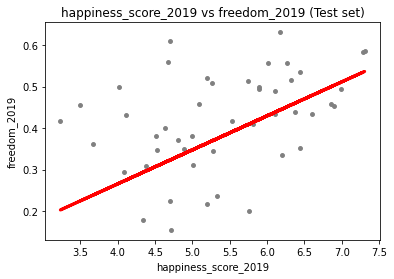

In [76]:
# create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('happiness_score_2019 vs freedom_2019 (Test set)')
plot_test.xlabel('happiness_score_2019')
plot_test.ylabel('freedom_2019')
plot_test.show()

In [77]:
# create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [78]:
# print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.08203696]]
Mean squared error:  0.014406430979530656
R2 score:  -0.05107980525917033


The plot (test model) shows a positive relationship, so the coefficient is positive (0.082). The slope means that as happiness_score_2019 rises, as well as the freedom_2019 rises too. In this case, the MSE shows 0.014, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of freedom_2019 to happiness_score_2019. The R2 is -5.1 percent, which the data isn't fit that great.

In [79]:
y_predicted

array([[0.4652437 ],
       [0.42069763],
       [0.4457189 ],
       [0.31782329],
       [0.46606407],
       [0.53669789],
       [0.43767928],
       [0.3234018 ],
       [0.27417963],
       [0.44375002],
       [0.36359991],
       [0.43013188],
       [0.32282755],
       [0.30773275],
       [0.42028745],
       [0.22339875],
       [0.45096927],
       [0.30797886],
       [0.43808947],
       [0.2960835 ],
       [0.23775522],
       [0.53431882],
       [0.26663223],
       [0.41380653],
       [0.32020236],
       [0.20231526],
       [0.36885028],
       [0.40839209],
       [0.36991676],
       [0.35416566],
       [0.51028199],
       [0.49937107],
       [0.29263795],
       [0.34711048],
       [0.47828758],
       [0.37393657],
       [0.33784031],
       [0.33201568],
       [0.36310769],
       [0.46023945],
       [0.3224994 ],
       [0.27237482],
       [0.34834104],
       [0.50265255],
       [0.40962264],
       [0.45580945],
       [0.39050803]])

In [80]:
# create a dataframe comparing the actual and predicted values of Y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.535,0.465244
1,0.495,0.420698
2,0.334,0.445719
3,0.401,0.317823
4,0.351,0.466064
5,0.585,0.536698
6,0.489,0.437679
7,0.154,0.323402
8,0.431,0.274180
9,0.631,0.443750


In [81]:
# predict

y_predicted_train = regression.predict(X_train) 

In [82]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [83]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.08203696]]
Mean squared error:  0.013949282365011422
R2 score:  0.38962116450670337


The plot (train model) shows a positive relationship, so the coefficient is positive (0.082). The slope means that as happiness_score_2019 rises, as well as the freedom_2019 rises too. In this case, the MSE shows 0.014, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of freedom_2019 to happiness_score_2019. The R2 is 39 percent, which the data isn't fit that great.

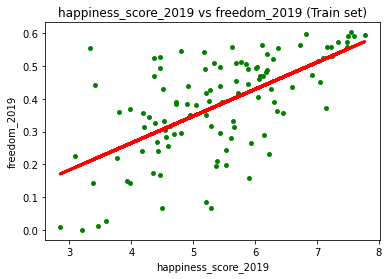

In [84]:
# visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('happiness_score_2019 vs freedom_2019 (Train set)')
plot_test.xlabel('happiness_score_2019')
plot_test.ylabel('freedom_2019')
plot_test.show()

The models outcome on the training set is very similar to that on the test set. With the MSE larger on the test set; The R2 is higher in train set compared to test set.

# 04e. Data Preparation for Regression Analysis - 2019 Data

### happiness_score_2019 vs trust_2019

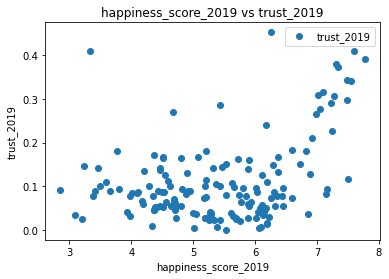

In [85]:
# Create a scatterplot using matplotlib to have another look on how the chosen variables plot against each other

df_2019.plot(x = 'happiness_score_2019', y='trust_2019',style='o')
plt.title('happiness_score_2019 vs trust_2019')  
plt.xlabel('happiness_score_2019')  
plt.ylabel('trust_2019')  
plt.show()

In [86]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df_2019['happiness_score_2019'].values.reshape(-1,1)
y = df_2019['trust_2019'].values.reshape(-1,1)

In [87]:
X

array([[7.769],
       [7.6  ],
       [7.554],
       [7.494],
       [7.488],
       [7.48 ],
       [7.343],
       [7.307],
       [7.278],
       [7.246],
       [7.228],
       [7.167],
       [7.139],
       [7.09 ],
       [7.054],
       [7.021],
       [6.985],
       [6.923],
       [6.892],
       [6.852],
       [6.825],
       [6.726],
       [6.595],
       [6.592],
       [6.446],
       [6.444],
       [6.436],
       [6.375],
       [6.374],
       [6.354],
       [6.321],
       [6.3  ],
       [6.293],
       [6.262],
       [6.253],
       [6.223],
       [6.199],
       [6.198],
       [6.192],
       [6.182],
       [6.174],
       [6.149],
       [6.125],
       [6.118],
       [6.105],
       [6.1  ],
       [6.086],
       [6.07 ],
       [6.046],
       [6.028],
       [6.021],
       [6.008],
       [5.94 ],
       [5.895],
       [5.893],
       [5.89 ],
       [5.888],
       [5.886],
       [5.86 ],
       [5.809],
       [5.779],
       [5.758],
       [

In [88]:
y

array([[0.393],
       [0.41 ],
       [0.341],
       [0.118],
       [0.298],
       [0.343],
       [0.373],
       [0.38 ],
       [0.308],
       [0.226],
       [0.29 ],
       [0.093],
       [0.082],
       [0.316],
       [0.278],
       [0.31 ],
       [0.265],
       [0.21 ],
       [0.128],
       [0.036],
       [0.182],
       [0.151],
       [0.073],
       [0.183],
       [0.097],
       [0.056],
       [0.078],
       [0.132],
       [0.167],
       [0.079],
       [0.054],
       [0.086],
       [0.15 ],
       [0.453],
       [0.074],
       [0.03 ],
       [0.11 ],
       [0.014],
       [0.016],
       [0.05 ],
       [0.24 ],
       [0.042],
       [0.034],
       [0.057],
       [0.127],
       [0.006],
       [0.05 ],
       [0.005],
       [0.041],
       [0.087],
       [0.097],
       [0.028],
       [0.064],
       [0.056],
       [0.161],
       [0.028],
       [0.06 ],
       [0.14 ],
       [0.078],
       [0.096],
       [0.064],
       [0.02 ],
       [

In [89]:
# Split data into a training set and a test set.  Using test_train_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

# 05e. Regression Analysis - 2019 Data

### happiness_score_2019 vs trust_2019

In [90]:
# create a regression object

regression = LinearRegression()

In [91]:
# fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [92]:
# predict the values of y using X

y_predicted = regression.predict(X_test)

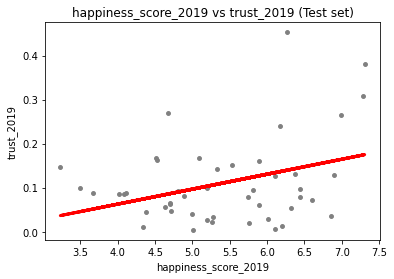

In [93]:
# create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('happiness_score_2019 vs trust_2019 (Test set)')
plot_test.xlabel('happiness_score_2019')
plot_test.ylabel('trust_2019')
plot_test.show()

In [94]:
# create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [95]:
# print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.03396141]]
Mean squared error:  0.00827695989289675
R2 score:  0.0918959837568174


The plot (test model) shows a positive relationship, so the coefficient is positive (0.034). The slope means that as happiness_score_2019 rises, as well as the trust_2019 rises too. In this case, the MSE shows 0.008, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of trust_2019 to happiness_score_2019. The R2 is 9.2 percent, which the data fit very poor.

In [96]:
y_predicted

array([[0.14558483],
       [0.12714378],
       [0.13750201],
       [0.08455617],
       [0.14592444],
       [0.17516522],
       [0.13417379],
       [0.08686555],
       [0.0664887 ],
       [0.13668694],
       [0.10350664],
       [0.13104934],
       [0.08662782],
       [0.08037892],
       [0.12697398],
       [0.04546658],
       [0.13967554],
       [0.0804808 ],
       [0.1343436 ],
       [0.0755564 ],
       [0.05140983],
       [0.17418034],
       [0.06336425],
       [0.12429102],
       [0.08554105],
       [0.0367385 ],
       [0.10568017],
       [0.12204957],
       [0.10612167],
       [0.09960108],
       [0.16422965],
       [0.15971278],
       [0.07413002],
       [0.09668039],
       [0.15098469],
       [0.10778578],
       [0.09284275],
       [0.09043149],
       [0.10330287],
       [0.14351318],
       [0.08649197],
       [0.06574155],
       [0.09718982],
       [0.16107123],
       [0.12255899],
       [0.14167927],
       [0.11464598]])

In [97]:
# create a dataframe comparing the actual and predicted values of Y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.078,0.145585
1,0.161,0.127144
2,0.014,0.137502
3,0.056,0.084556
4,0.097,0.145924
5,0.380,0.175165
6,0.006,0.134174
7,0.047,0.086866
8,0.087,0.066489
9,0.240,0.136687


In [98]:
# predict

y_predicted_train = regression.predict(X_train) 

In [99]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [100]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.03396141]]
Mean squared error:  0.007252954176100776
R2 score:  0.173822440324384


The plot (train model) shows a positive relationship, so the coefficient is positive (0.034). The slope means that as happiness_score_2019 rises, as well as the trust_2019 rises too. In this case, the MSE shows 0.007, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of trust_2019 to happiness_score_2019. The R2 is 17.4 percent, which the data fit very poor.

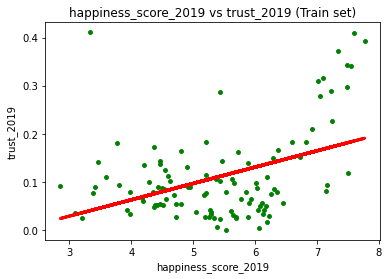

In [101]:
# visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('happiness_score_2019 vs trust_2019 (Train set)')
plot_test.xlabel('happiness_score_2019')
plot_test.ylabel('trust_2019')
plot_test.show()

The models outcome on the training set is very similar to that on the test set. With the MSE larger on the test set; The R2 is higher in train set compared to test set.

# 04f. Data Preparation for Regression Analysis - 2019 Data


### happiness_score_2019 vs generosity_2019

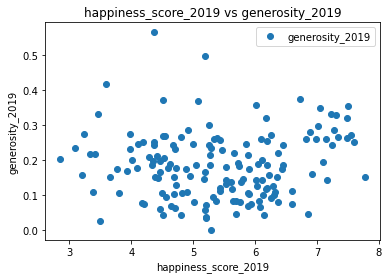

In [102]:
# Create a scatterplot using matplotlib to have another look on how the chosen variables plot against each other

df_2019.plot(x = 'happiness_score_2019', y='generosity_2019',style='o')
plt.title('happiness_score_2019 vs generosity_2019')  
plt.xlabel('happiness_score_2019')  
plt.ylabel('generosity_2019')  
plt.show()

In [103]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df_2019['happiness_score_2019'].values.reshape(-1,1)
y = df_2019['generosity_2019'].values.reshape(-1,1)

In [104]:
X

array([[7.769],
       [7.6  ],
       [7.554],
       [7.494],
       [7.488],
       [7.48 ],
       [7.343],
       [7.307],
       [7.278],
       [7.246],
       [7.228],
       [7.167],
       [7.139],
       [7.09 ],
       [7.054],
       [7.021],
       [6.985],
       [6.923],
       [6.892],
       [6.852],
       [6.825],
       [6.726],
       [6.595],
       [6.592],
       [6.446],
       [6.444],
       [6.436],
       [6.375],
       [6.374],
       [6.354],
       [6.321],
       [6.3  ],
       [6.293],
       [6.262],
       [6.253],
       [6.223],
       [6.199],
       [6.198],
       [6.192],
       [6.182],
       [6.174],
       [6.149],
       [6.125],
       [6.118],
       [6.105],
       [6.1  ],
       [6.086],
       [6.07 ],
       [6.046],
       [6.028],
       [6.021],
       [6.008],
       [5.94 ],
       [5.895],
       [5.893],
       [5.89 ],
       [5.888],
       [5.886],
       [5.86 ],
       [5.809],
       [5.779],
       [5.758],
       [

In [105]:
y

array([[0.153],
       [0.252],
       [0.271],
       [0.354],
       [0.322],
       [0.263],
       [0.267],
       [0.33 ],
       [0.285],
       [0.244],
       [0.332],
       [0.144],
       [0.261],
       [0.194],
       [0.348],
       [0.298],
       [0.261],
       [0.16 ],
       [0.28 ],
       [0.046],
       [0.262],
       [0.375],
       [0.074],
       [0.111],
       [0.242],
       [0.187],
       [0.175],
       [0.08 ],
       [0.22 ],
       [0.153],
       [0.109],
       [0.099],
       [0.127],
       [0.271],
       [0.093],
       [0.158],
       [0.255],
       [0.121],
       [0.185],
       [0.117],
       [0.322],
       [0.043],
       [0.099],
       [0.144],
       [0.2  ],
       [0.262],
       [0.066],
       [0.083],
       [0.19 ],
       [0.126],
       [0.142],
       [0.359],
       [0.075],
       [0.175],
       [0.103],
       [0.107],
       [0.215],
       [0.069],
       [0.246],
       [0.146],
       [0.137],
       [0.081],
       [

In [106]:
# Split data into a training set and a test set.  Using test_train_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

# 05f. Regression Analysis - 2019 Data

### happiness_score_2019 vs generosity_2019

In [107]:
# create a regression object

regression = LinearRegression()

In [108]:
# fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [109]:
# predict the values of y using X

y_predicted = regression.predict(X_test)

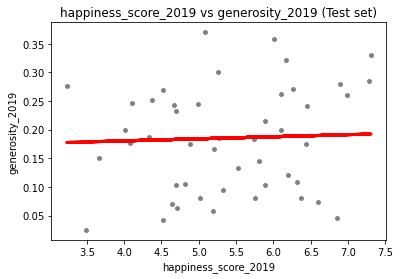

In [110]:
# create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('happiness_score_2019 vs generosity_2019 (Test set)')
plot_test.xlabel('happiness_score_2019')
plot_test.ylabel('generosity_2019')
plot_test.show()

In [111]:
# create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [112]:
# print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.0036111]]
Mean squared error:  0.008227537648617214
R2 score:  0.010894872026764646


The plot (test model) shows a positive relationship, so the coefficient is positive (0.004). The slope means that as happiness_score_2019 rises, as well as the generosity_2019 rises too. In this case, the MSE shows 0.008, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of generosity_2019 to happiness_score_2019. The R2 is 1 percent, which the data fit very poor.

In [113]:
y_predicted

array([[0.18938067],
       [0.18741985],
       [0.18852123],
       [0.18289153],
       [0.18941679],
       [0.19252594],
       [0.18816734],
       [0.18313708],
       [0.18097042],
       [0.18843457],
       [0.18490652],
       [0.18783512],
       [0.1831118 ],
       [0.18244736],
       [0.18740179],
       [0.17873515],
       [0.18875234],
       [0.1824582 ],
       [0.1881854 ],
       [0.18193459],
       [0.17936709],
       [0.19242122],
       [0.1806382 ],
       [0.18711651],
       [0.18299625],
       [0.1778071 ],
       [0.18513763],
       [0.18687818],
       [0.18518458],
       [0.18449124],
       [0.19136317],
       [0.19088289],
       [0.18178292],
       [0.18418069],
       [0.18995484],
       [0.18536152],
       [0.18377264],
       [0.18351625],
       [0.18488485],
       [0.1891604 ],
       [0.18309736],
       [0.18089098],
       [0.18423486],
       [0.19102734],
       [0.18693235],
       [0.1889654 ],
       [0.18609096]])

In [114]:
# create a dataframe comparing the actual and predicted values of Y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.175,0.189381
1,0.103,0.187420
2,0.121,0.188521
3,0.070,0.182892
4,0.242,0.189417
5,0.330,0.192526
6,0.262,0.188167
7,0.064,0.183137
8,0.247,0.180970
9,0.322,0.188435


In [115]:
# predict

y_predicted_train = regression.predict(X_train) 

In [116]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [117]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.0036111]]
Mean squared error:  0.009296268131356126
R2 score:  0.0018524268666607613


The plot (train model) shows a positive relationship, so the coefficient is positive (0.004). The slope means that as happiness_score_2019 rises, as well as the generosity_2019 rises too. In this case, the MSE shows 0.01, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of generosity_2019 to happiness_score_2019. The R2 is 1.8 percent, which the data fit very poor.

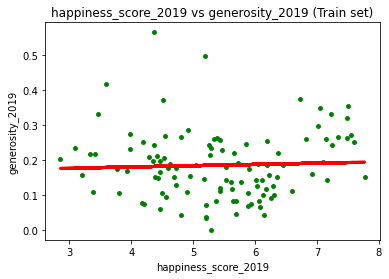

In [118]:
# visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('happiness_score_2019 vs generosity_2019 (Train set)')
plot_test.xlabel('happiness_score_2019')
plot_test.ylabel('generosity_2019')
plot_test.show()

The models outcome on the training set is very similar to that on the test set. With the MSE larger on the train set; The R2 is higher in test set compared to train set.